/Users/vsong/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


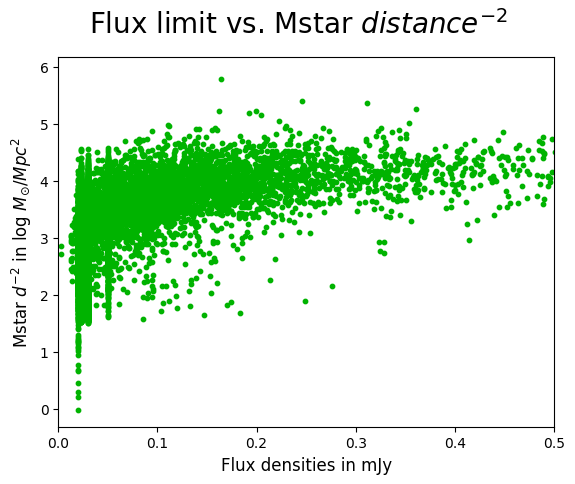

In [2]:
#------------Flux graph-----------
#import stuff
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
from astropy.table import Table, join
import numpy as np
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("anaconda/lib/python2.7/site-packages/matplotlib/mpl-data/matplotlibrc")
%matplotlib inline


fig = plt.figure()
fig.suptitle('Flux limit vs. Mstar ${distance^{-2}}$', fontsize=20)

#-------Add data to the plots------
t = ascii.read('CANDELS_incorrect_fits_dist.txt')

plt.xlabel("Flux densities in mJy", fontsize=12)
plt.ylabel("Mstar ${d^{-2}}$ in log $M_{\odot}$/$Mpc^{2}$", fontsize=12)
plt.scatter(t['s24(mJy)'],t['M_med'] - 2*np.log10(t['unitless_dist']),s=10,facecolor=(0,0.7,0))

plt.xlim(0,0.5)
fig.savefig('CANDELS_flux.png', dpi=300, bbox_inches='tight')

In [5]:
#-----Opening and joining FITS files with CANDELS----- 

#Imported some stuff. 
import numpy as np
from astropy.io import fits, ascii
from astropy.table import Table, join

candels = ascii.read("CANDELS_info.txt")

#Open FITS files
galdict = {0:'cos', 1:'gds', 2:'egs', 3:'uds'}
merged = []
data = []
for k, v in galdict.items():
    merged.append(fits.open(v + '_merged_v1.1.fits', memmap=True))
    data.append(Table(merged[k][1].data))
    data[k]['field'] = [v.upper()]


#Joining the FITS with candels 
def ftbl(table): 
    return join(table['field','ID','M_med', 'zbest','PETRO_RADIUS'], candels, keys = ['field','ID'])

tbls = []
for i in range(4): 
    tbls.append(ftbl(data[i]))

for i in range(len(tbls[3]['M_med'])): 
    if np.log10(tbls[3][i]['M_med']) > 0:
        tbls[3][i]['M_med'] = np.log10(tbls[3][i]['M_med'])
    else: 
        tbls[3][i]['M_med'] = 0

def jtbl(t1, t2): 
    return join(t1, t2,join_type='outer')

cand_new = jtbl(jtbl(jtbl(tbls[0],tbls[1]),tbls[2]),tbls[3]) 
cand_new.write('CANDELS_incorrect_fits.txt', format='ascii.latex', overwrite=True)
cand_new

field,ID,M_med,zbest,PETRO_RADIUS,fagn_mir,lir,s24(mJy)
str3,int64,float64,float64,float64,float64,float64,float64
COS,1,9.10855,1.08,9.24,0.2,10.34,0.023
COS,10,9.2324,1.213,7.26,0.6,10.69,0.023
COS,15,9.40427,1.82,7.92,0.2,10.64,0.023
COS,20,9.69289,1.24,10.56,0.2,10.92,0.082
COS,22,9.43548,1.389,7.92,0.6,10.66,0.023
COS,34,8.70269,1.04,7.26,0.2,10.28,0.023
COS,38,10.5512,1.928,6.6,0.2,11.56,0.193
COS,45,8.9832,0.91,10.56,0.2,10.13,0.023
COS,50,9.29288,0.98,4.62,1.0,10.01,0.023


In [27]:
#-----Opening and joining FITS files with CANDELS----- 

#Imported some stuff. 
import numpy as np
from astropy.io import fits, ascii
from astropy.table import Table, join

t = ascii.read("CANDELS_incorrect_fits.txt")


#Function for the main sequence line
from astropy import cosmology
from astropy.cosmology import FlatLambdaCDM

cosmo = FlatLambdaCDM(H0=69.6, Om0=0.286)
dist = cosmo.angular_diameter_distance(t['zbest'])
t['distance'] = dist
t['unitless_dist'] = [0.0]

for i in range(len(t['distance'])): 
    t[i]['unitless_dist'] = t[i]['distance']
t.write('CANDELS_incorrect_fits_dist.txt', format='ascii.latex', overwrite=True)
    
t

field,ID,M_med,zbest,PETRO_RADIUS,fagn_mir,lir,s24(mJy),distance,unitless_dist
,,,,,,,,Mpc,
str3,int64,float64,float64,float64,float64,float64,float64,float64,float64
COS,1,9.10855,1.08,9.24,0.2,10.34,0.023,1704.29766521,1704.29766521
COS,10,9.2324,1.213,7.26,0.6,10.69,0.023,1739.41748072,1739.41748072
COS,15,9.40427,1.82,7.92,0.2,10.64,0.023,1771.09044021,1771.09044021
COS,20,9.69289,1.24,10.56,0.2,10.92,0.082,1744.83424961,1744.83424961
COS,22,9.43548,1.389,7.92,0.6,10.66,0.023,1766.18280154,1766.18280154
COS,34,8.70269,1.04,7.26,0.2,10.28,0.023,1690.61531311,1690.61531311
COS,38,10.5512,1.928,6.6,0.2,11.56,0.193,1763.75179683,1763.75179683
COS,45,8.9832,0.91,10.56,0.2,10.13,0.023,1634.02447643,1634.02447643
